In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
import cv2
import glob

In [2]:
import os
path,dir,files = next(os.walk('./data/sunflower_disease'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  300


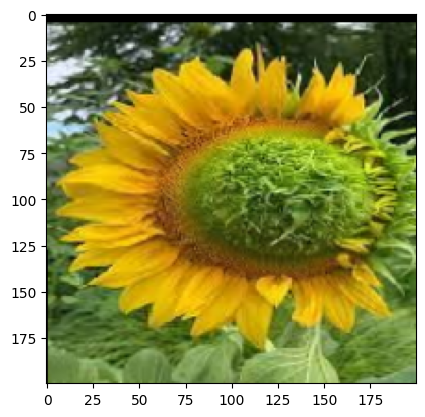

In [3]:
img = mpimg.imread('./data/sunflower_disease/aster_yellow_(116).png')
imgplot = plt.imshow(img)
plt.show()

In [4]:
path1,dir,files = next(os.walk('./data/sunflower_disease'))
print(files[16])

aster_yellow_(113).png


In [5]:
sunflower_healthy = []
aster_yellow= []

for i in range(len(files)):
    if files[i][0:9] == 'sunflower':
        sunflower_healthy.append(files[i])
    elif files[i][0:12] == 'aster_yellow':
        aster_yellow.append(files[i])
 
print(len(sunflower_healthy),len(aster_yellow))

150 150


In [6]:
original_path = './data/sunflower_disease'
new_path = 'sunflower_compressed_images/'
os.mkdir(new_path)

In [7]:
from PIL import Image
import os, sys

def resize_rename_rotate(srcdir,srcfile, targetdir="", size=(224,224)):
  src_path = srcdir+srcfile

  targetfile = os.path.splitext(srcfile)
  extension = os.path.splitext(srcfile)[1]
     
  if srcfile != targetfile:
     try :
         im = Image.open(src_path)
         im = im.rotate(90)
         im = im.resize(size) 
         im.save(targetdir+targetfile[0]+'__'+".jpg")
     except IOError as io:
         print ("cannot change image for ", srcfile)

if __name__=="__main__":
  targetdir = "sunflower_compressed_images1/"
  srcdir = "sunflower_compressed_images/"

  for file in os.listdir(srcdir):
     resize_rename_rotate(srcdir,file,targetdir)

In [8]:
for i in range(len(files)):
    filename = os.listdir(path)[i]
    f_img = path+"/"+filename
    img = Image.open(f_img)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    new_img_path = new_path+'/'+filename
    img.save(new_img_path)

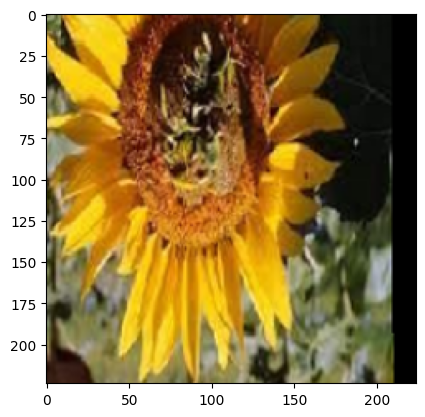

In [9]:
img = mpimg.imread('./sunflower_compressed_images/aster_yellow_(13).png')
imgplot = plt.imshow(img)
plt.show()

In [10]:
image_directory = 'sunflower_compressed_images/'
image_extensions = ['png','jpg','jpeg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
flower_images = np.asarray([cv2.imread(file) for file in files])

In [11]:
flower_images.shape

(300, 224, 224, 3)

In [12]:
filenames = os.listdir('sunflower_compressed_images/')

In [13]:
labels = []
for i in range(0,len(filenames)):
        # print(filenames)
        if filenames[i][0:9] == 'sunflower':
                labels.append(0)
        elif filenames[i][0:12] == 'aster_yellow':
                labels.append(1) 
print(len(labels))

300


In [14]:
labels.count(0), labels.count(1)

(150, 150)

In [15]:
X = flower_images
Y = np.asarray(labels)

In [16]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [18]:
Y_train.shape,Y_test.shape

((240,), (60,))

In [19]:
X_train_scaled = X_train/255

In [20]:
X_test_scaled = X_test/255

In [21]:
import tensorflow_hub as hub

In [22]:
# mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
res_net_model = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
pretrained_model = hub.KerasLayer(res_net_model,input_shape=(224,224,3),trainable=False)

In [23]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [24]:
number_of_classes = 2

retrained_model = hub.KerasLayer(res_net_model,input_shape=(None, 2048))

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 26,319,618
Trainable params: 2,754,818
Non

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [26]:
history = model.fit(X_train_scaled,Y_train,epochs=30,validation_split=0.25,batch_size=16)

Epoch 1/30


c:\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 11s 641ms/step - loss: 0.7128 - acc: 0.7500 - val_loss: 0.0737 - val_acc: 0.9833
Epoch 2/30
12/12 [==============================] - 7s 572ms/step - loss: 0.0253 - acc: 0.9944 - val_loss: 0.0902 - val_acc: 0.9667
Epoch 3/30
12/12 [==============================] - 7s 569ms/step - loss: 0.0061 - acc: 0.9944 - val_loss: 0.2067 - val_acc: 0.9667
Epoch 4/30
12/12 [==============================] - 7s 566ms/step - loss: 5.3589e-04 - acc: 1.0000 - val_loss: 0.1833 - val_acc: 0.9667
Epoch 5/30
12/12 [==============================] - 7s 566ms/step - loss: 5.0982e-05 - acc: 1.0000 - val_loss: 0.1391 - val_acc: 0.9833
Epoch 6/30
12/12 [==============================] - 7s 576ms/step - loss: 1.7340e-05 - acc: 1.0000 - val_loss: 0.1482 - val_acc: 0.9833
Epoch 7/30
12/12 [==============================] - 7s 567ms/step - loss: 1.1771e-05 - acc: 1.0000 - val_loss: 0.1567 - val_acc: 0.9667
Epoch 8/30
12/12 [==============================] - 7s 561ms/step - lo

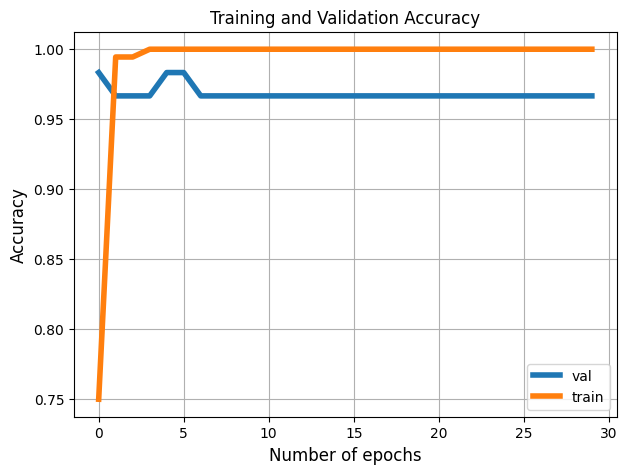

In [27]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_acc'],linewidth = 4)
plt.plot(history.history['acc'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

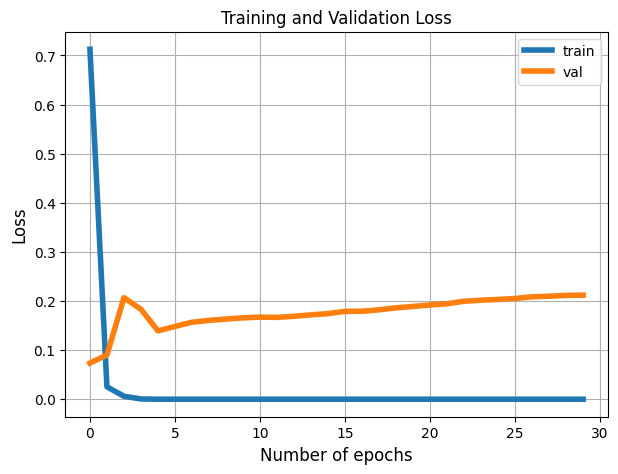

In [28]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()

In [29]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss = ",score)
print("Test Acc = ",acc)

2/2 [==============================] - 2s 826ms/step - loss: 0.0013 - acc: 1.0000
Test Loss =  0.001323829172179103
Test Acc =  1.0


1/1 [==============================] - 1s 598ms/step
0
Sunflower: Healthy


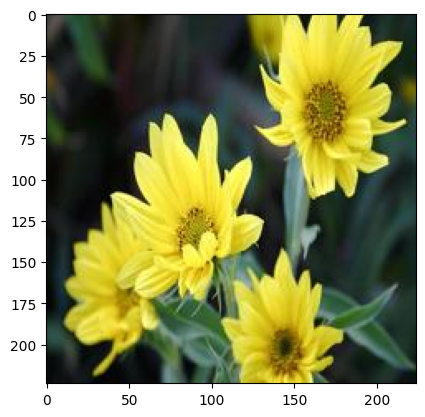

In [30]:
img_test = cv2.imread('./sunflower_compressed_images/sunflower_(21).jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread('./sunflower_compressed_images/sunflower_(21).jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Sunflower: Healthy")
elif input_label == 1:
    print("Sunflower: Aster Yellow")

In [31]:
model.save('sunflower_model.h5')

In [32]:
from tensorflow.keras.models import load_model

In [33]:
load_models = load_model('sunflower_model.h5',custom_objects={'KerasLayer':hub.KerasLayer})